In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [5]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


In [9]:
dataset = kitti_object('../../kitti/object', 'training')

data_idx = 1000
objects = dataset.get_label_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

../../kitti/object training
../../kitti/object/training/velodyne/001000.bin
('All point num: ', 122695)
('FOV point num: ', (20171, 4))
pc_velo (20171, 4)
==================== (20171, 4)
box3d_pts_3d_velo:
[[ 1.38386758e+01 -4.05836319e+00 -1.42353819e+00]
 [ 1.56062028e+01 -3.96686996e+00 -1.40409978e+00]
 [ 1.58387911e+01 -8.45061626e+00 -1.44904670e+00]
 [ 1.40712642e+01 -8.54210949e+00 -1.46848511e+00]
 [ 1.38233152e+01 -4.07389426e+00  4.62995998e-02]
 [ 1.55908421e+01 -3.98240103e+00  6.57380101e-02]
 [ 1.58234305e+01 -8.46614733e+00  2.07910864e-02]
 [ 1.40559035e+01 -8.55764056e+00  1.35267609e-03]]
box3d_pts_3d_velo:
[[52.01252429  3.55795408 -1.84422159]
 [52.17334048  1.94602906 -1.85957341]
 [47.69581429  1.4998124  -1.91108102]
 [47.5349981   3.11173742 -1.8957292 ]
 [51.99664119  3.54189474 -0.32438932]
 [52.15745738  1.92996972 -0.33974114]
 [47.67993119  1.48375306 -0.39124875]
 [47.519115    3.09567808 -0.37589693]]
box3d_pts_3d_velo:
[[45.35831942  7.21331104 -1.91514

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

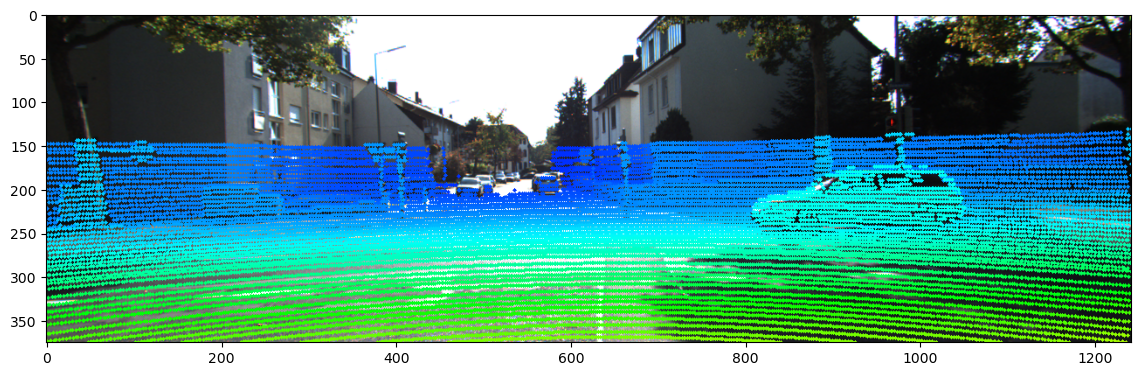

In [10]:
img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

fig_lidar = plt.figure(figsize=(14, 7))
ax_lidar = fig_lidar.subplots()
ax_lidar.imshow(img_lidar)
plt.show()

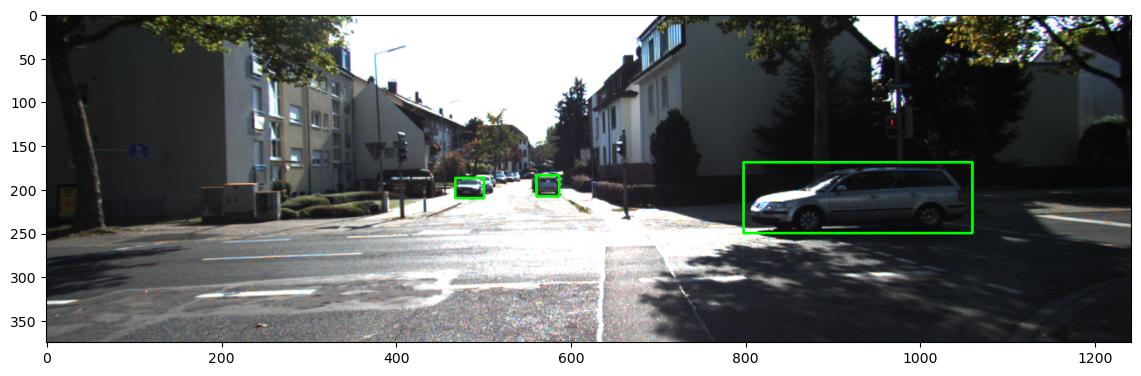

In [11]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

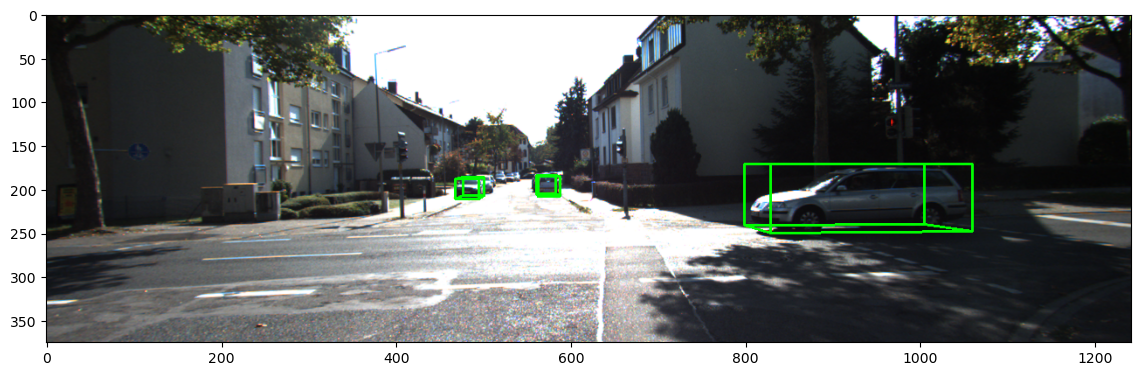

In [12]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


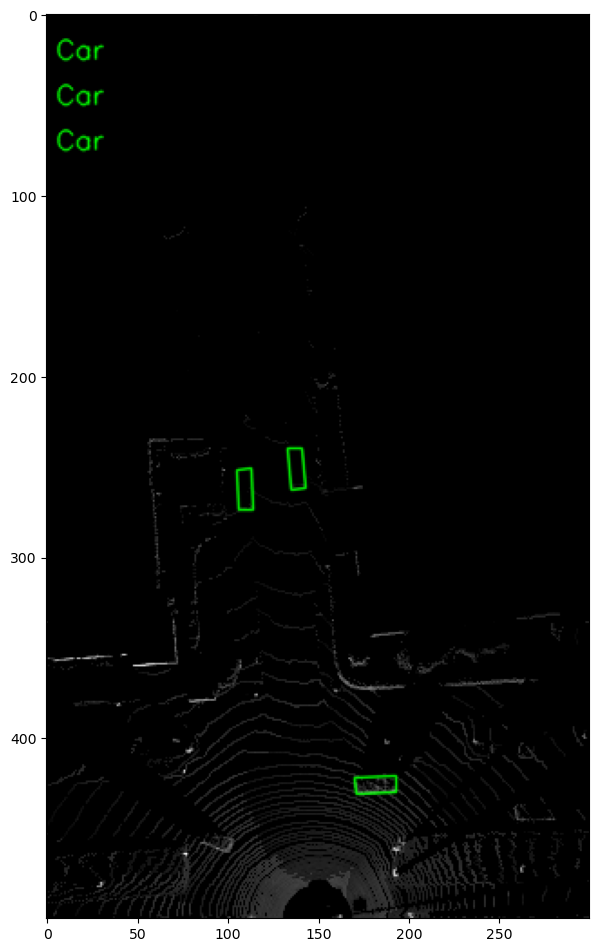

In [13]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()